In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Advertising.csv")
df.head(10)

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,10.6


In [3]:
df.shape

(200, 4)

In [4]:
df.size

800

In [5]:
columns = df.columns
columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
df.isnull().sum()  # there is no null value

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [8]:
df[df.duplicated()]  # no duplicated rows

,TV,radio,newspaper,sales


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


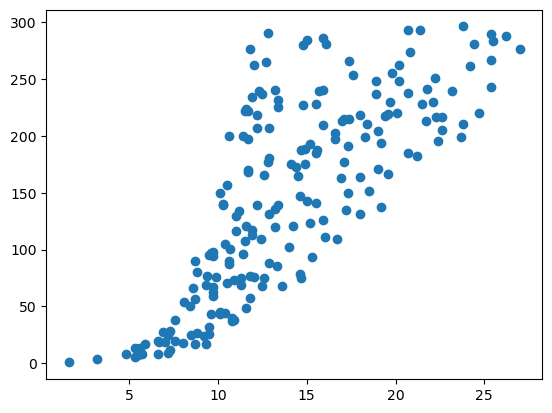

In [10]:
plt.scatter(df["sales"],df["TV"])

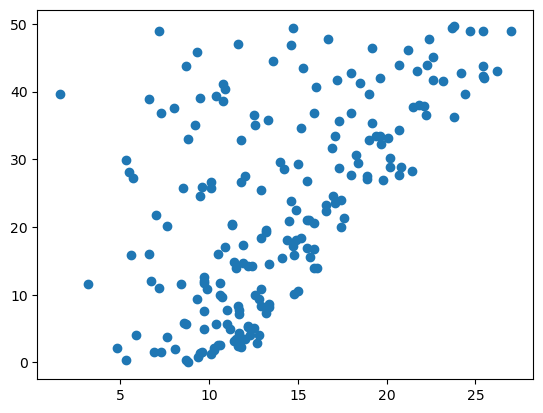

In [11]:
plt.scatter(df["sales"],df["radio"])

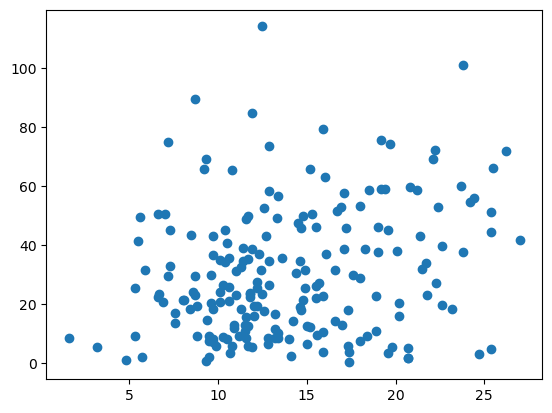

In [12]:
plt.scatter(df["sales"],df["newspaper"])

<Axes: >

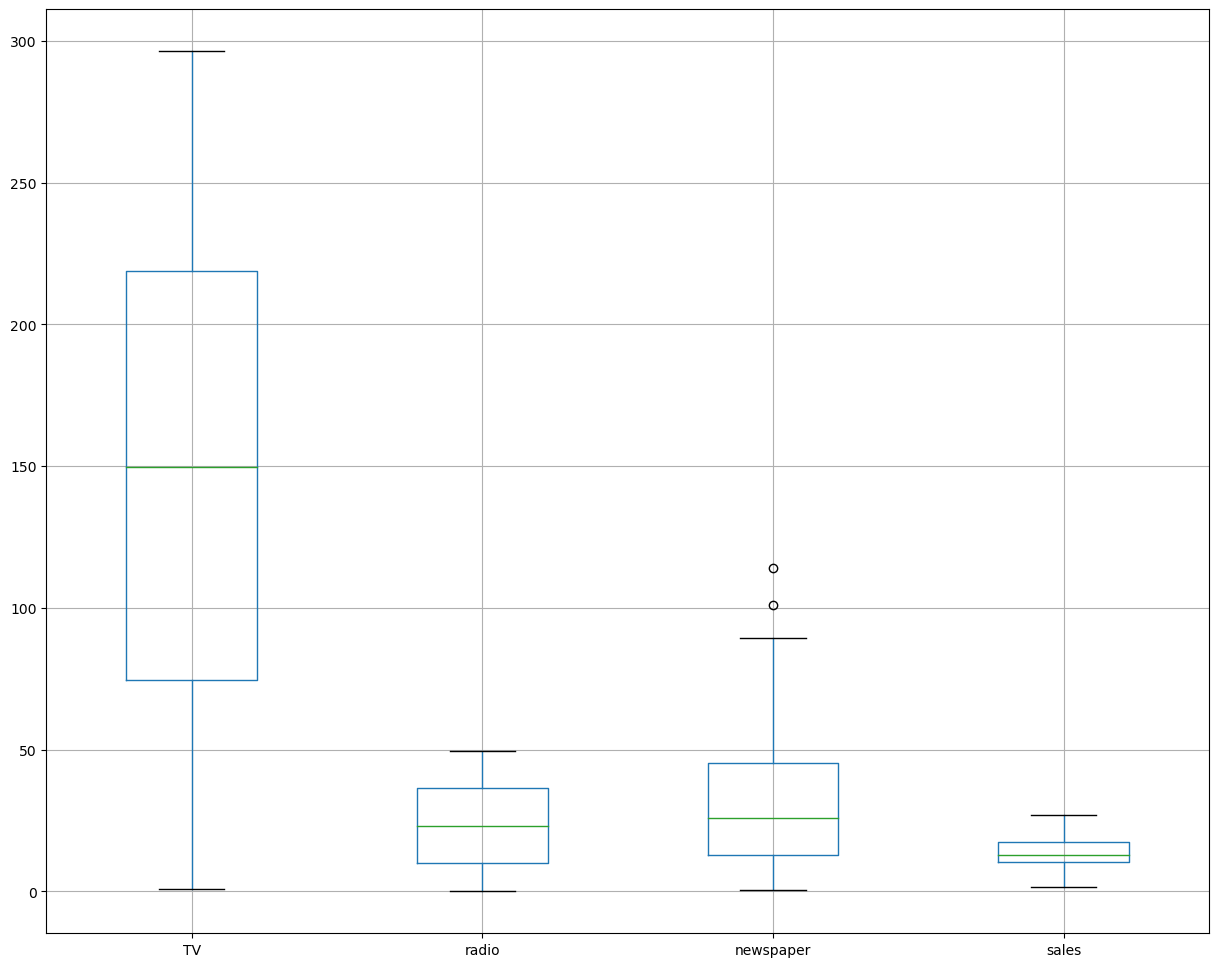

In [13]:
# checking for outliers
plt.figure(figsize=(15,12))
df.boxplot(column=["TV","radio","newspaper","sales"]) 

There are outliers in the newspaper column

In [14]:
# Removing outliers using IQR method
# Finding values of outliers(IQR method)

def detect_outliers_iqr(data):
    outlier_list = []
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    #print("The Val of Q1 and Q2",q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    #print("The lower & Upper Bound",lwr_bound, upr_bound)
    
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outlier_list.append(i)
    return outlier_list # Driver code



for i in ["TV","radio","newspaper","sales"]:
    outliers = detect_outliers_iqr(df[i])
    print("Outliers in",i,"attribute :", outliers)

Outliers in TV attribute : []
Outliers in radio attribute : []
Outliers in newspaper attribute : [100.9, 114.0]
Outliers in sales attribute : []


In [15]:
# Handling outliers using Quantile based flooring and capping method.
#the outlier is capped at a certain value above the 90th percentile value or floored at a factor below the 10th percentile value
# Computing 10th, 90th percentiles and replacing the outliers

def handle_outliers(data):

    tenth_percentile = np.percentile(data, 10)
    ninetieth_percentile = np.percentile(data, 90)

    b = np.where(data<tenth_percentile, tenth_percentile, data)

    b1 = np.where(b>ninetieth_percentile, ninetieth_percentile, b)
    return b1


for i in ["newspaper"]:
    df[i]=handle_outliers(df[i])

<Axes: >

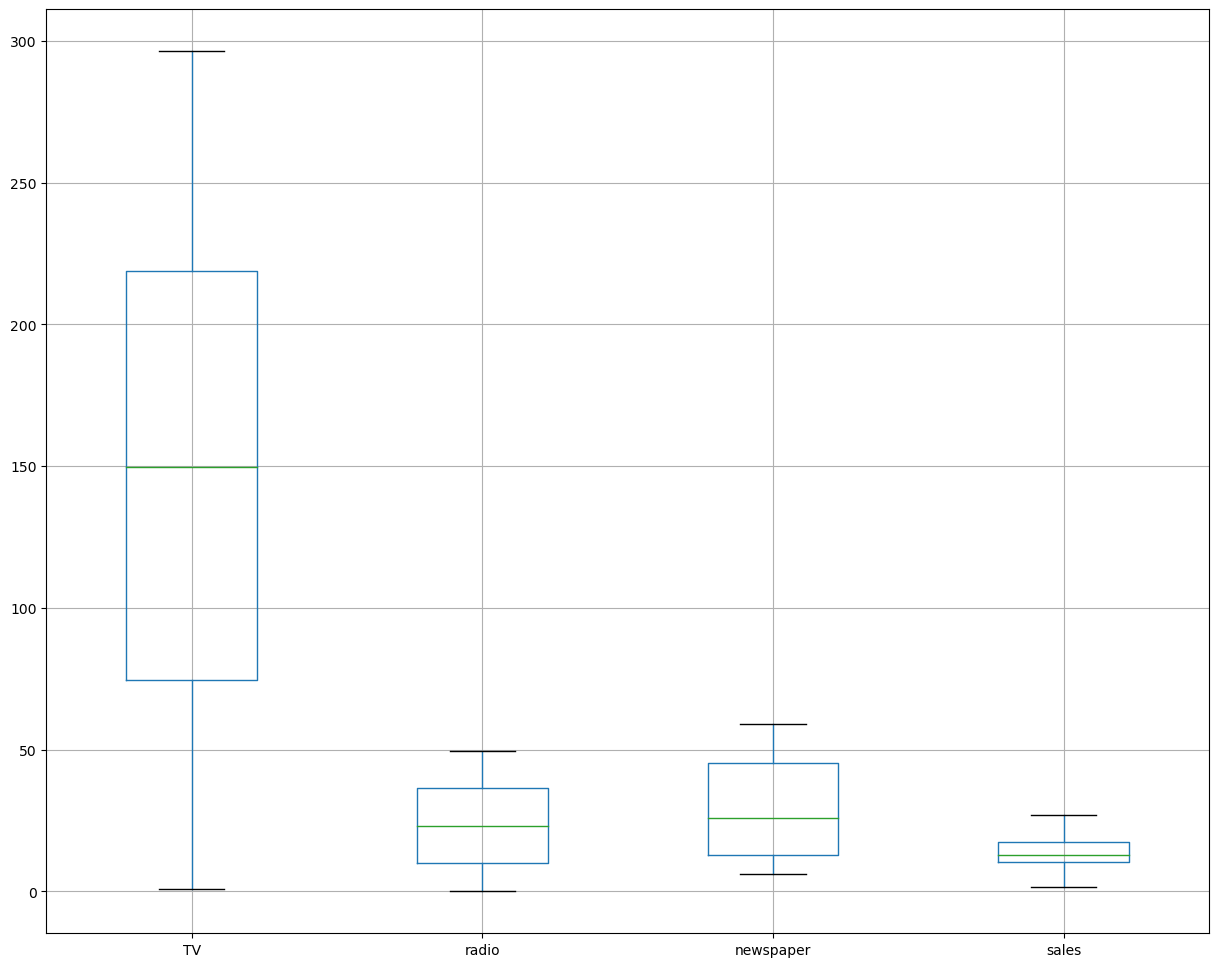

In [16]:
# checking for outliers
plt.figure(figsize=(15,12))
df.boxplot(column=["TV","radio","newspaper","sales"]) 

Now there are no outliers present

# Preparing the data

In [21]:
x = df[["TV"]]
print(x)
y = df[["sales"]]
print(y)

<class 'pandas.core.frame.DataFrame'>
     sales
0     22.1
1     10.4
2      9.3
3     18.5
4     12.9
..     ...
195    7.6
196    9.7
197   12.8
198   25.5
199   13.4

[200 rows x 1 columns]


In [19]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 1) # 75:25

In [20]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(x_test.shape)

(150, 1)
(50, 1)
(150, 1)
(50, 1)


# Simple Linear regression

In [22]:
from sklearn.linear_model import LinearRegression

simple_linear_regression_model = LinearRegression()

simple_linear_regression_model.fit(x_train,y_train)

LinearRegression()

In [23]:
# prediction using the model on testing data

pred = simple_linear_regression_model.predict(x_test)

In [24]:
pred  # predicted values

array([[17.03658069],
       [16.63793625],
       [11.50839099],
       [20.36982452],
       [19.10184704],
       [20.53312465],
       [14.75518181],
       [15.59569719],
       [10.30285179],
       [17.25751616],
       [14.81281715],
       [10.23561056],
       [17.22389554],
       [12.18560623],
       [17.75702244],
       [12.94927449],
       [13.23745119],
       [20.87413375],
       [ 8.14152654],
       [17.03177774],
       [11.7341294 ],
       [10.16836933],
       [ 8.11751182],
       [12.07033555],
       [12.33449753],
       [15.96072101],
       [ 8.98204192],
       [18.86169979],
       [14.92328489],
       [18.44384358],
       [18.43423769],
       [18.17487866],
       [14.10198129],
       [15.08658502],
       [18.84248801],
       [15.79261793],
       [17.59372231],
       [13.12698346],
       [17.32475739],
       [ 7.85334984],
       [ 7.54115841],
       [11.2538349 ],
       [ 7.81012333],
       [16.71478337],
       [ 7.2625876 ],
       [13

In [25]:
y_test # actual values

,sales
58,23.8
40,16.6
34,9.5
102,14.8
184,17.6
198,25.5
95,16.9
4,12.9
29,10.5
168,17.1


# Evalution on training data

In [29]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
pred_train = simple_linear_regression_model.predict(x_train)

print('MAE on Train Data :', mean_absolute_error(pred_train,y_train))
print('MSE on Train Data :', mean_squared_error(pred_train,y_train))
print('RMSE on Train Data :', np.sqrt(mean_squared_error(pred_train,y_train)))
print('R-squared on Train Data :',simple_linear_regression_model.score(x_train, y_train))

MAE on Train Data : 2.570904686544903
MSE on Train Data : 10.585647707604128
RMSE on Train Data : 3.253559236836503
R-squared on Train Data : 0.623827651655809


# Evalution on testing data

In [30]:
pred_test = simple_linear_regression_model.predict(x_test)

print('MAE on Train Data :', mean_absolute_error(pred_test,y_test))
print('MSE on Train Data :', mean_squared_error(pred_test,y_test))
print('RMSE on Train Data :', np.sqrt(mean_squared_error(pred_test,y_test)))
print('R-squared on Train Data :',simple_linear_regression_model.score(x_test, y_test))

MAE on Train Data : 2.4643080986027908
MSE on Train Data : 10.310069587813155
RMSE on Train Data : 3.210929707703542
R-squared on Train Data : 0.5590828580007852


# Linear regression line

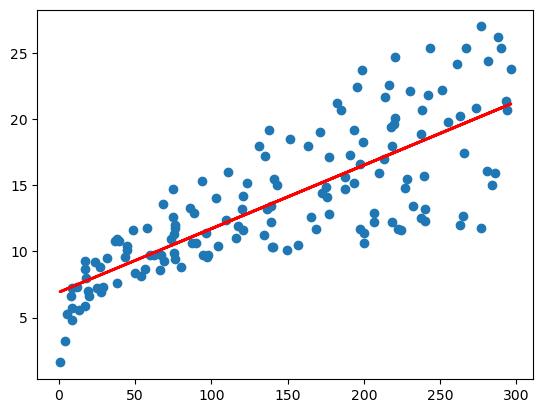

In [32]:
# Plot the linear regression line
plt.scatter(x_train,y_train)
plt.plot(x_train, simple_linear_regression_model.predict(x_train), color='red', linewidth=2, label='Linear Regression Line')

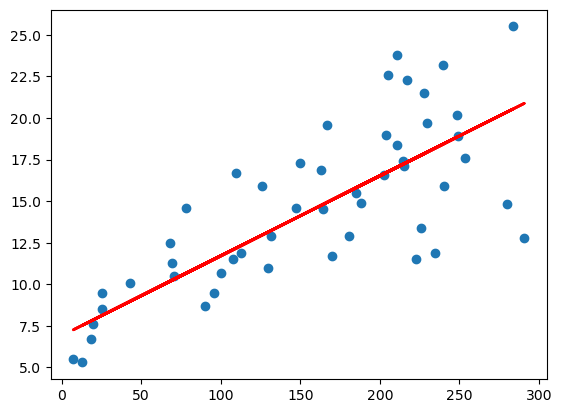

In [33]:
plt.scatter(x_test,y_test)
plt.plot(x_test, simple_linear_regression_model.predict(x_test), color='red', linewidth=2, label='Linear Regression Line')

In [34]:
## This is prediction on sales only by taking the "TV" attribute as a parameter . By the same way we can take radio,newspaper as attributes as well

# Multiple Linear Regression

In [39]:
x = df[["TV","radio","newspaper"]]
print(x)
y = df[["sales"]]
print(y)

        TV  radio  newspaper
0    230.1   37.8      59.07
1     44.5   39.3      45.10
2     17.2   45.9      59.07
3    151.5   41.3      58.50
4    180.8   10.8      58.40
..     ...    ...        ...
195   38.2    3.7      13.80
196   94.2    4.9       8.10
197  177.0    9.3       6.40
198  283.6   42.0      59.07
199  232.1    8.6       8.70

[200 rows x 3 columns]
     sales
0     22.1
1     10.4
2      9.3
3     18.5
4     12.9
..     ...
195    7.6
196    9.7
197   12.8
198   25.5
199   13.4

[200 rows x 1 columns]


In [40]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 1) # 75:25

In [43]:
multiple_linear_regression_model = LinearRegression()

multiple_linear_regression_model.fit(x_train,y_train)


LinearRegression()

In [44]:
 ## We can also do the Metrics evalution like we did for the simple linear regression

In [47]:
multiple_pred = multiple_linear_regression_model.predict(x_test)
multiple_pred

array([[21.70235386],
       [16.42372687],
       [ 7.57036626],
       [17.79987197],
       [18.62180273],
       [23.89125862],
       [16.40255328],
       [13.56118512],
       [ 9.23243014],
       [17.43910606],
       [14.51881952],
       [ 9.80718831],
       [17.11191731],
       [16.78006614],
       [15.17978811],
       [15.63812451],
       [12.4578472 ],
       [17.13128964],
       [11.00075935],
       [17.92619058],
       [ 9.23560798],
       [12.89069365],
       [ 8.85596009],
       [10.3776692 ],
       [11.43377949],
       [14.9790982 ],
       [ 9.81304516],
       [19.36907592],
       [18.08035889],
       [17.11694215],
       [21.48159529],
       [14.75020988],
       [16.14794138],
       [12.37070089],
       [19.88268377],
       [15.30584957],
       [13.86147814],
       [10.07158975],
       [20.8946746 ],
       [ 7.41899106],
       [ 3.67823287],
       [ 7.24030942],
       [ 6.00144748],
       [18.48304306],
       [ 8.44055031],
       [14

In [48]:
print('R-squared on Train Data :',multiple_linear_regression_model.score(x_test, y_test))

R-squared on Train Data : 0.9144949343409279
